In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

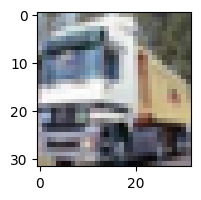

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[1])

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7653 - loss: 0.6687 - val_accuracy: 0.6783 - val_loss: 0.9576
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7804 - loss: 0.6304 - val_accuracy: 0.6792 - val_loss: 0.9556
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8002 - loss: 0.5797 - val_accuracy: 0.6871 - val_loss: 0.9463
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8033 - loss: 0.5601 - val_accuracy: 0.6785 - val_loss: 0.9845
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8140 - loss: 0.5319 - val_accuracy: 0.6825 - val_loss: 0.9908
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8270 - loss: 0.4989 - val_accuracy: 0.6801 - val_loss: 1.0067
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8339 - loss: 0.4767 - val_accuracy: 0.6835 - val_loss: 1.0261
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8490 - loss: 0.4407 - val_accuracy: 0.

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6704 - loss: 1.3500
1.3513402938842773
0.6700999736785889


In [ ]:
classes = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def predict(image_index):
  image = x_test[image_index]
  true_label = np.argmax(y_test[image_index])
  prediction = model.predict(np.expand_dims(image, axis=0))
  predicted_label = np.argmax(prediction)
  plt.imshow(image)
  plt.title(f"True: {classes[true_label]} | Predicted: {classes[predicted_label]}")
  plt.axis('off')
  return plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


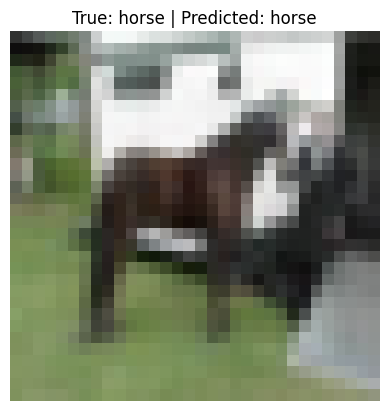

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


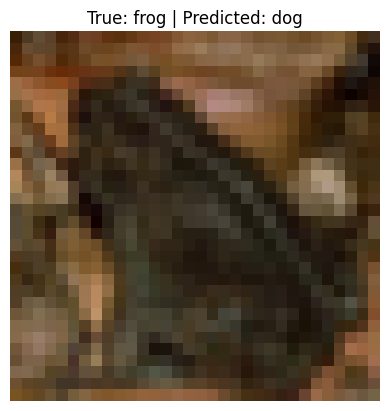

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


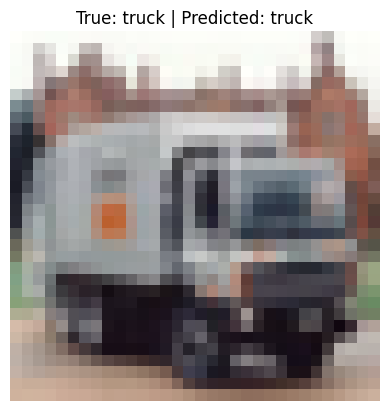

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


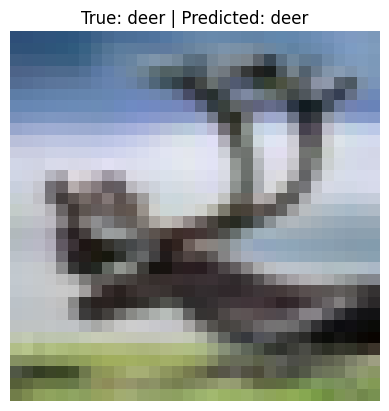

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


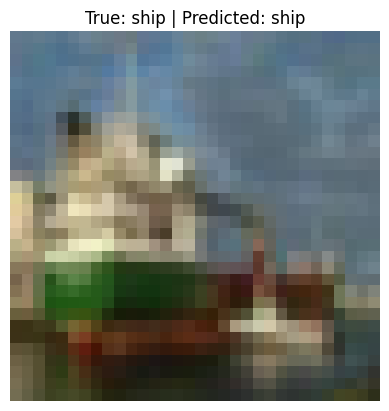

In [ ]:
predict(20)
predict(30)
predict(11)
predict(40)
predict(51)